In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [2]:
#importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D ,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [3]:
dataset_path="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

classes= os.listdir(dataset_path)
num_classes = len(classes)
print(f"Number of classes: {num_classes}")
print(f"Classes: {classes}")

Number of classes: 90
Classes: ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


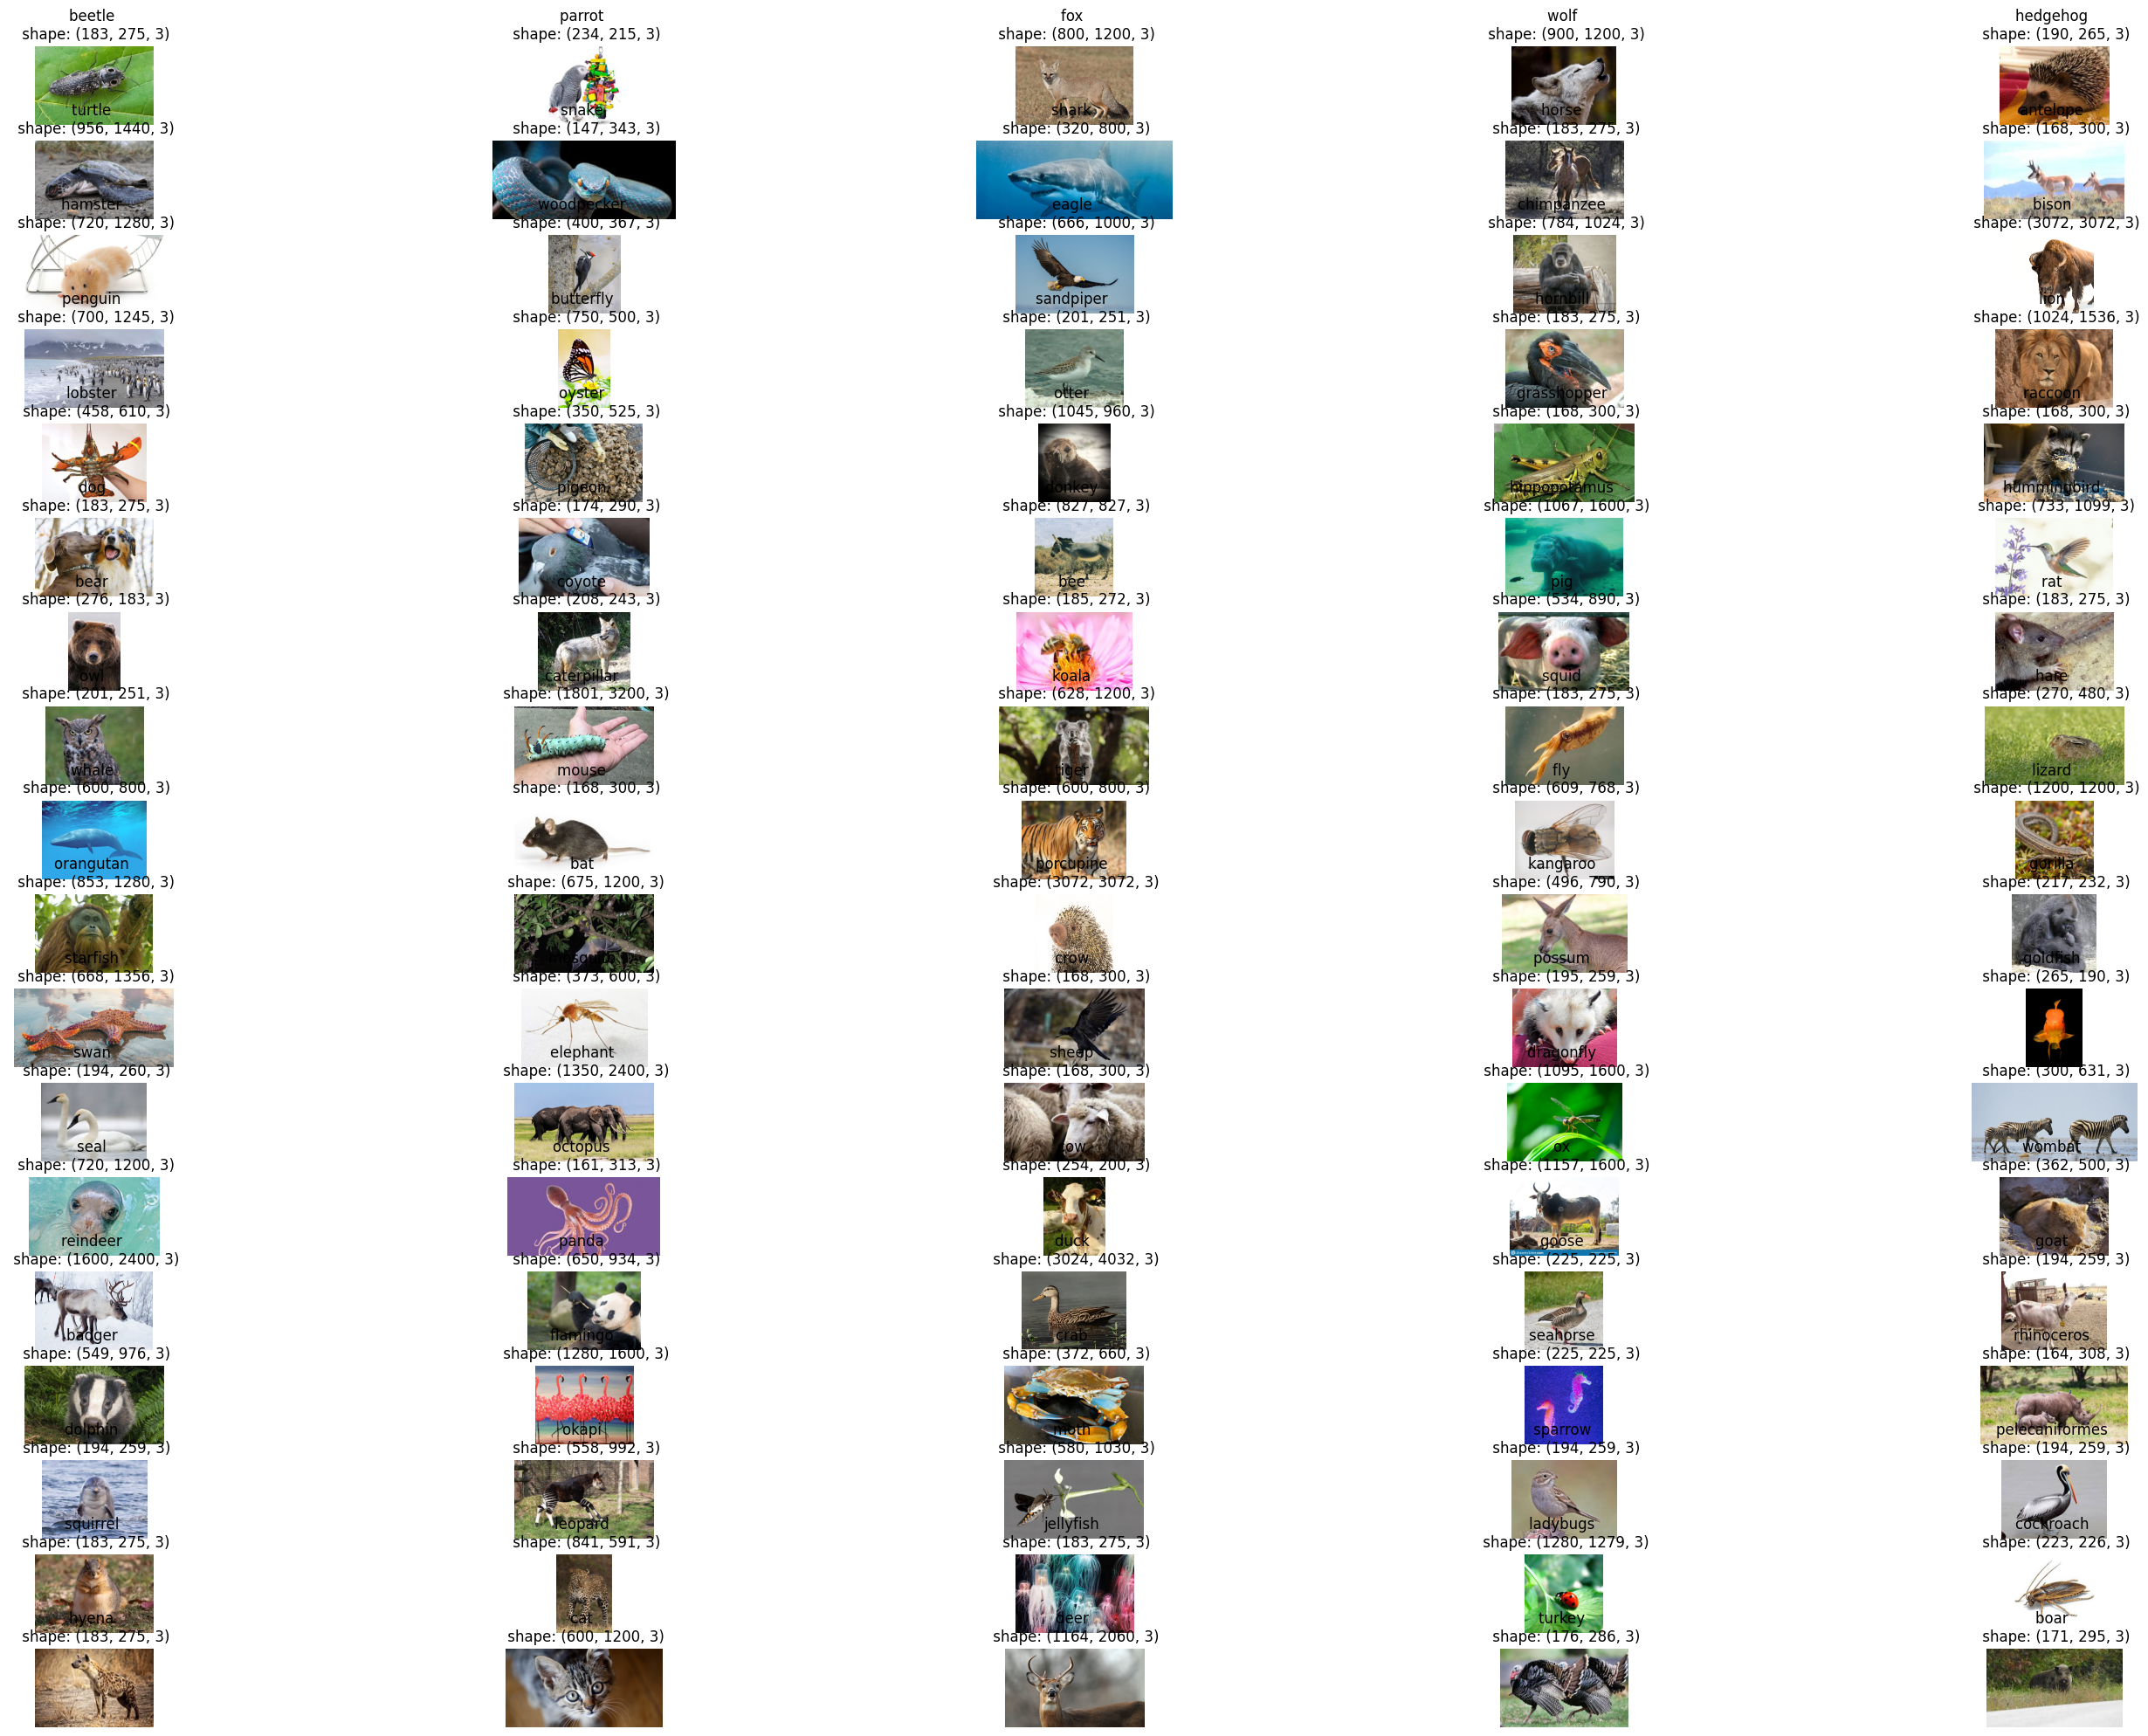

In [4]:
# Visualize some sample images form the dataset
plt.figure(figsize=(35,25))
for i, class_name in enumerate(classes[:90]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(18, 5, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()


In [5]:
#Preprocessing of data

batch_size = 64 #images per batch
image_size = (224, 224)

#Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
#Training and validation generator.
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [6]:
#Mapping Classes
class_indices = train_generator.class_indices
print(class_indices)

#Extracting class name
class_name = list(class_indices.keys())
print("class name: ",class_name)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [7]:
#Loading MobilenetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False ,
    input_shape=(224, 224, 3)
)
#Freezing base model weights
base_model.trainable = False

#Adding Custom layers
x= base_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
x= Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

#Creating model
model = Model(inputs=base_model.input, outputs=predictions)
#Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Model Summary
model.summary()



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,661,978 (13.97 MB)

 Trainable params: 1,403,994 (5.36 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 969ms/step - accuracy: 0.4102 - loss: 2.7197 - val_accuracy: 0.7930 - val_loss: 0.7487
Epoch 2/10
 1/75 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8281 - loss: 0.7705

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8281 - loss: 0.7705 - val_accuracy: 0.7910 - val_loss: 0.7726
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 99s 547ms/step - accuracy: 0.9046 - loss: 0.3504 - val_accuracy: 0.8301 - val_loss: 0.6609
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.8594 - loss: 0.4354 - val_accuracy: 0.8340 - val_loss: 0.6358
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 508ms/step - accuracy: 0.9587 - loss: 0.1681 - val_accuracy: 0.8223 - val_loss: 0.6161
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.9531 - loss: 0.1967 - val_accuracy: 0.8262 - val_loss: 0.5999
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 76s 492ms/step - accuracy: 0.9802 - loss: 0.0790 - val_accuracy: 0.8477 - val_loss: 0.6081
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9844 - loss: 0.0625 - val_accuracy: 0.8496 - val_loss: 0.5960
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 552ms/step - accuracy: 0.9900 - loss: 0.0518 - val_accuracy: 0.8457 - val_

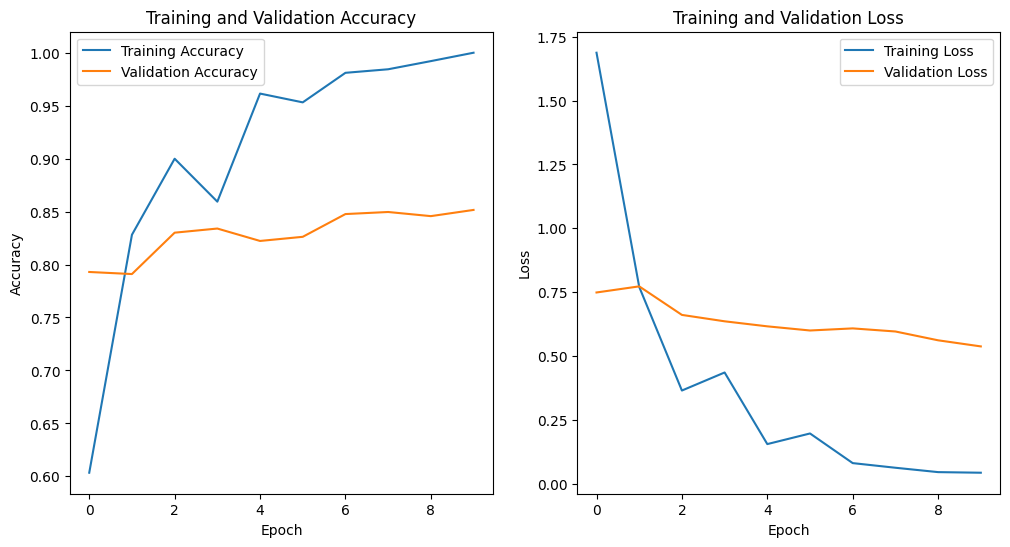

In [9]:
#Evaluating the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
#Evaluating the model on validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 790ms/step - accuracy: 0.8451 - loss: 0.5732
Validation Loss: 0.5560305714607239
Validation Accuracy: 0.8500000238418579


In [11]:
#Saving The model

model.save('MCAR.keras')

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('MCAR.keras')

def predict_animal(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    predicted_class = class_name[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()




In [15]:
os.listdir('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/lion')

['9acdf9a504.jpg',
 '0a0300a234.jpg',
 '51d9525bd9.jpg',
 '1e1b3ea01c.jpg',
 '4c0f082b74.jpg',
 '22aa65105f.jpg',
 '5fb837c61b.jpg',
 '7cf8e64072.jpg',
 '4c6ec7185d.jpg',
 '05d42c9bd8.jpg',
 '92f5424e4d.jpg',
 '9b237131a3.jpg',
 '67e24a4b79.jpg',
 '35bb50c8cd.jpg',
 '4c6398221e.jpg',
 '56b70b4ecc.jpg',
 '7d8f058238.jpg',
 '09b23c3373.jpg',
 '355a292afc.jpg',
 '49e03e97bf.jpg',
 '143db76fdf.jpg',
 '61e6f6109c.jpg',
 '7dc0036a9d.jpg',
 '7a9a41f459.jpg',
 '92c30c59f8.jpg',
 '48c8d7664f.jpg',
 '5b8cc93b29.jpg',
 '33cf8a44c3.jpg',
 '8b42d2c018.jpg',
 '70f0d3a1a8.jpg',
 '65b368f341.jpg',
 '1e1b33f87e.jpg',
 '8caaf87eae.jpg',
 '4d29f849f8.jpg',
 '3af8eda7af.jpg',
 '2fac13108c.jpg',
 '326ccde052.jpg',
 '25b7a71420.jpg',
 '0209bbf635.jpg',
 '35e8b2fceb.jpg',
 '2d670c088a.jpg',
 '2e33d2250b.jpg',
 '9fe4200d49.jpg',
 '30ec7a1f53.jpg',
 '96a73103e3.jpg',
 '8cb1b87044.jpg',
 '7dcef33a0b.jpg',
 '4dbdd0fea8.jpg',
 '0b36ead42d.jpg',
 '41ee7cdad6.jpg',
 '8ee9a43ad6.jpg',
 '5f8df573bf.jpg',
 '12f57cfa18

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


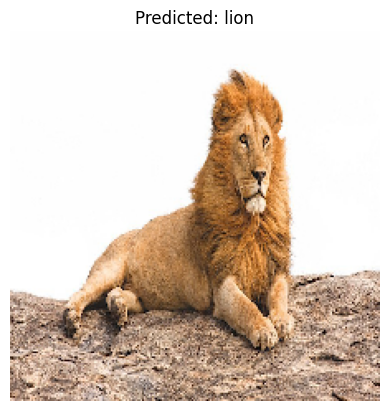

In [17]:
predict_animal('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/lion/49ce57d2a1.jpg')